# SIR-Modell

## Parameter

- `a`: Die Übertragbarkeit des Virus. Hängt davon ab wie viele `Suseptible` und wie viele `Infected` es gibt.
- `b`: Die Rate wie schnell man nach einer Infektion zurück zu den `Suseptible` geht. Das Individuum hat also durch die Infektion keine Immunität erhalten. Hängt davon ab wie viele `Infected` es gibt. Reduziert die Anzahl `Infected`.
- `c`: Die Rate mit der infizierte Individuun *heilen*, also sich immunisieren. Hängt von `Infected` ab. Reduziert die Anzahl `Infected`.
- `d`: Die Rate mit der geimpft wird. Hängt nur von `Suseptible` ab. Reduziert `Suseptible` und erhöht `Vaccinated`.
- `e`: Die Rate mit der immunisierte (`Removed`) die Immunität verlieren. Hängt von `Removed` ab. Erhöht `Suseptible`.
- `f`: Die Rate mit der geimpfte Individuuen den Impfschutz verlieren. Hängt von `Vaccinated` ab und erhöht `Suseptible`.
- `g`: Die Rate mit der sich geimpfte trozdem anstecken können. Die Idee hier ist das sich geimpfte anstecken können, aber nicht mehr sterben an der Infektion. Diese Rate hängt von `Vaccinated` und `Infected` ab. `g` sollte sehr klein gewählt werden, da er von 2 Grössen abhängt.
- `h`: Die Rate mit der infizierte-geimpfte Individuuen von `Suseptible` anstecken können.
- `i`: Die Rate mit der *False-Negative* getestet wird.
- `i`: Die Rate mit der *False-Negative* getestete Individuuen andere aus der Gruppe `Suseptible` anstecken.
- `k`: Todesrate bei Infizierten. Hängt von `Infected` ab und erhöht `Dead`.

## Events

Mit dem Objekt `events` kann das geschehen der Pandemie kontinuierlich verändert werden. Es kann für jeden Zeitschritt `t` ein Event angegeben werden. Bei einem Event werden die Parameter der laufenden Pandemie neu gesetzt.

**Beispiel:**
Zum Zeitpunkt `t=50` werden Massnahmen umgesetzt, welche die Verbreitung des Virus erschweren.

```python
events[50] = {'a': 0.0005}
```

In [23]:
from lib.iteration import *
import ipywidgets as widgets
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 20)

a = widgets.FloatSlider(0.0003, description='a:', step=0.0001, min=0.0, max=0.001, readout_format='.4f')
b = widgets.FloatSlider(0.1, description='b:', step=0.01, min=0.0, max=0.5, readout_format='.1f')
c = widgets.FloatSlider(0.001, description='c:', step=0.001, min=0.0, max=0.1, readout_format='.3f')
d = widgets.FloatSlider(0.0, description='d:', step=0.001, min=0.0, max=0.01, readout_format='.3f')
e = widgets.FloatSlider(0.0, description='e:', step=0.01, min=0.0, max=0.1, readout_format='.2f')
f = widgets.FloatSlider(0.0, description='f:', step=0.01, min=0.0, max=0.1, readout_format='.2f')
g = widgets.FloatSlider(0.0, description='g:', step=0.01, min=0.0, max=0.1, readout_format='.2f')
h = widgets.FloatSlider(0.0, description='h:', step=0.01, min=0.0, max=0.1, readout_format='.2f')
i = widgets.FloatSlider(0.0, description='i:', step=0.01, min=0.0, max=0.1, readout_format='.2f')
j = widgets.FloatSlider(0.0, description='j:', step=0.01, min=0.0, max=0.1, readout_format='.2f')

s_start = widgets.IntSlider(990, description='S:', step=10, min=0, max=10000)
i_start = widgets.IntSlider(10, description='I:', step=10, min=0, max=10000)

days = widgets.IntSlider(365, description='Anzahl Tage', min=14, max=730)

daily_fluctuations = widgets.FloatSlider(0.0, description='Tägliche Unsicherheit', min=0.0, max=1.0)

display(a, b, c, d, e, f, h, g, i, j, s_start, i_start, days, daily_fluctuations)

highlight = {'Infected': {
        'color': 'red',
        'linewidth': 3,
        'linestyle': '-.'
    },'Suseptible': {
        'color': 'green'
    }, 'Dead': {
        'color': 'black'
    }, 'VI': {
        'color': 'magenta'
}}

FloatSlider(value=0.0003, description='a:', max=0.001, readout_format='.4f', step=0.0001)

FloatSlider(value=0.1, description='b:', max=0.5, readout_format='.1f', step=0.01)

FloatSlider(value=0.001, description='c:', max=0.1, readout_format='.3f', step=0.001)

FloatSlider(value=0.0, description='d:', max=0.01, readout_format='.3f', step=0.001)

FloatSlider(value=0.0, description='e:', max=0.1, step=0.01)

FloatSlider(value=0.0, description='f:', max=0.1, step=0.01)

FloatSlider(value=0.0, description='h:', max=0.1, step=0.01)

FloatSlider(value=0.0, description='g:', max=0.1, step=0.01)

FloatSlider(value=0.0, description='i:', max=0.1, step=0.01)

FloatSlider(value=0.0, description='j:', max=0.1, step=0.01)

IntSlider(value=990, description='S:', max=10000, step=10)

IntSlider(value=10, description='I:', max=10000, step=10)

IntSlider(value=365, description='Anzahl Tage', max=730, min=14)

FloatSlider(value=0.0, description='Tägliche Unsicherheit', max=1.0)

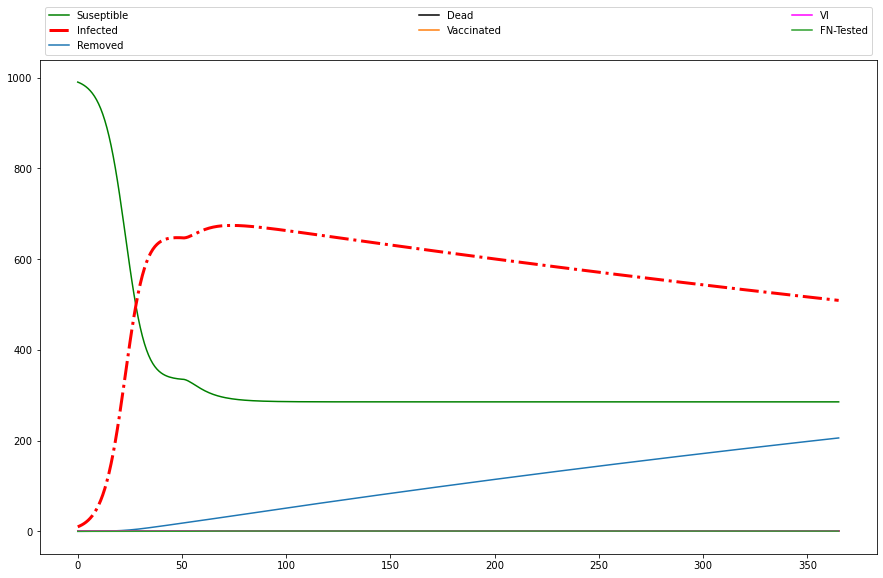

Tote: 0.0


In [24]:
events = {
    50: {'i': 0.0001, 'j': 0.05}, 
}

l = iteration(sir_modell, x0=[s_start.value, i_start.value, 0, 0, 0, 0, 0],
              n=days.value, a=a.value, b=b.value, c=c.value, d=d.value,
              e=e.value, f=f.value, g=g.value, h=h.value, i=i.value, j=j.value,
              daily_fluctuations=daily_fluctuations.value,
              events=events)

plot_iteration(l, highlight=highlight)

print(f'Tote: {l[3][-1]}')